# 💼 Loan Approval Prediction

Welcome! This notebook explores how we can simulate loan approval likelihood using a machine learning model — specifically, a Random Forest classifier trained on historical application data.

Our goal is to:
- Understand which features most influence approval decisions
- Simulate approval scores based on user-defined inputs
- Visualize model performance and feature contributions

Whether you're a data analyst, business stakeholder, or curious learner, this notebook will guide you through:
1. **Importing data**
2. **Cleaning data**
3. **Exploration**
4. **Visualization**
5. **Machine Learning**
6. **Model diagnostics** 
7. **Score calculation**
8. **PowerBi Exploration** - a quick break to PowerBI to visualise our data and findings
9. **Summary**


Let’s dive in and explore how data-driven decisions can enhance financial screening.

## Importing Necessary Libraries

All we would like to achieve would not be possible without the necessary libraries that it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

## 📥 Importing Data

Our data is of the csv file format and this helps us bring it into our notebook for analysis.

In [2]:
filepath = r"loan_approval_dataset.csv"

df = pd.read_csv(filepath,  sep= ',')

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## 🧹 Cleaning Data
Raw data often contains missing values, duplicates, or inconsistencies and our results are as good as the quality of data we use. Which is why one of the first steps in analysis is cleaning the data to make it analysable. 

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

We can see that there is a whitespace before our column names and if we try to call these column names without including these whitespaces, it would throw an error code at us. To deal with this we apply the strip function to our dataset to remove the whitespace

In [5]:
# Apply the strip function to all column names
df.columns = df.columns.str.strip()

In [6]:
df['self_employed'] = df['self_employed'].str.strip()

In [7]:
df['education'] = df['education'].str.strip()

In [8]:
df['loan_status'] = df['loan_status'].str.strip()

Further down whilst trying to change these string values to boolean values, I discovered that there was a whitespace before the values so I have stripped them here so we dont have to deal with them next time.

In [9]:
df.rename(columns={'cibil_score' : 'credit_score'}, inplace = True)

The name cibil score is not widely known so we have renamed it to be credit score which is more recognised worldwide

## 🔍 Exploration

This step helps us understand the structure of the dataset.  
We’ll look at distributions, correlations, and summary statistics to uncover patterns and potential issues


In [10]:
#Preview last five rows

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
#Preview last five rows

df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [12]:
#Learning about the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   credit_score              4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
#Looking at the size of the dataset

df.shape

(4269, 13)

In [14]:
#Statistical summary of the numerical questions

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [15]:
#Checking for null values

df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
credit_score                0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [16]:
# Making our loan id the index of our dataset

df.set_index('loan_id', inplace = True)

In [17]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [18]:
#Checking if our dataset has any duplicated rows

df.duplicated().sum()

0

In [19]:
#Learning the sum of different loan outcomes

df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [20]:
# Save cleaned dataset for BI. The index=False drops the loan id as power bi would add an index to the file
df.to_csv("loan_data_ready.csv", index=False)

✔️  We have successfully completed a basic analysis to help us understand our dataset

### Moving into visualisations

In [21]:
# Checking available style formats

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [22]:
#Selecting a style format

plt.style.use('seaborn-v0_8-whitegrid')

In [23]:
#Creating a pie chart to visualise the distribuition of loan status

status_count = df['loan_status'].value_counts()

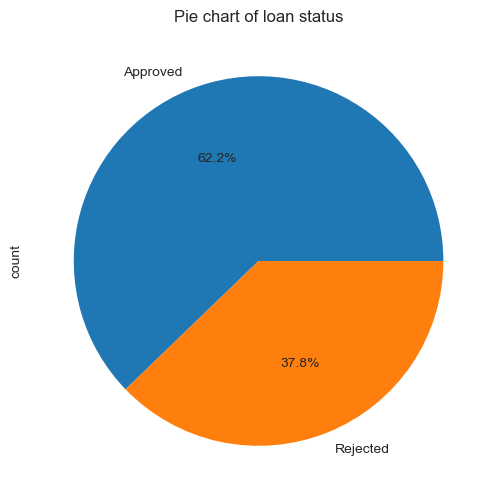

In [24]:
status_count.plot(kind = 'pie',
                 title = 'Pie chart of loan status',
                 figsize = (10, 6),
                 autopct = '%1.1f%%');

✔️ This shows that our dataset has more approvals than rejections

In [25]:
#Creating a pie chart to visualise the distribuition of education levels

education_count = df['education'].value_counts()

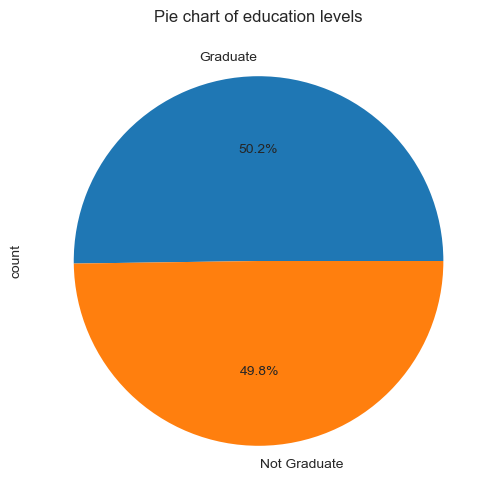

In [26]:
education_count.plot(kind = 'pie',
                 title = 'Pie chart of education levels',
                 figsize = (10, 6),
                 autopct = '%1.1f%%');

✔️ This shows that there is not much difference but we have more graduates than undergraduates in our dataset

In [27]:
#Creating a pie chart to see the difference in the self emplyment status

self_emp_count = df['self_employed'].value_counts()

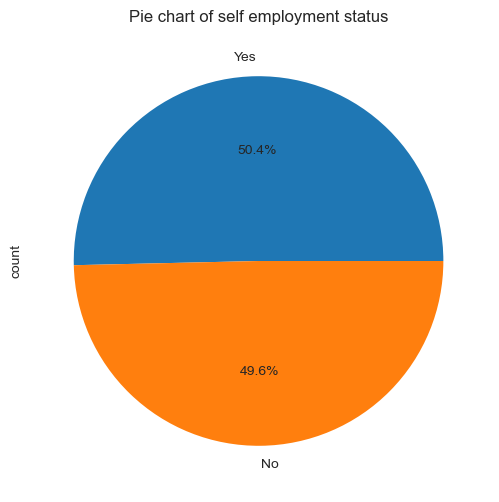

In [28]:
self_emp_count.plot(kind = 'pie',
                 title = 'Pie chart of self employment status',
                 figsize = (10, 6),
                 autopct = '%1.1f%%');

✔️ Again this shows not much differences but we can see more people are self employed than the amount that is not. Although I believe we would have gotten more insights if the employment status was not based on just being self employed or not. e.g employed, unemployed, employed partime etc.

In [29]:
#Visualising the relationship between number of dependents to loan application outcomes

rate = df.groupby(['no_of_dependents', 'loan_status']).size().unstack()
rate

loan_status,Approved,Rejected
no_of_dependents,,
0,457,255
1,430,267
2,441,267
3,457,270
4,465,287
5,406,267


In [30]:
rate_percent = rate.div(rate.sum(axis=1), axis=0) * 100

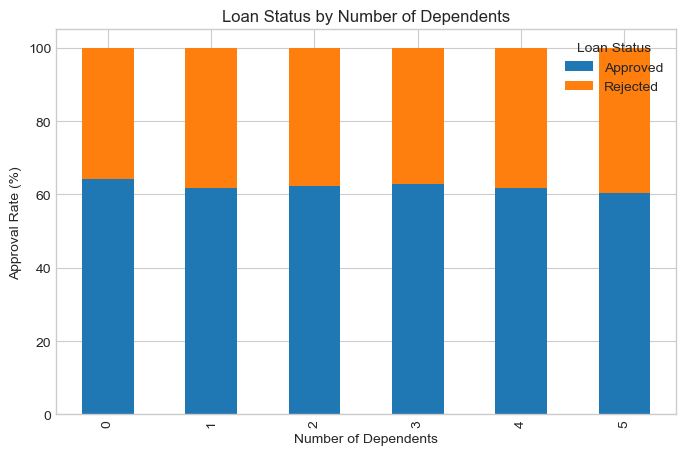

In [31]:
rate_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.xlabel("Number of Dependents")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Status by Number of Dependents")
plt.legend(title="Loan Status")
plt.show()


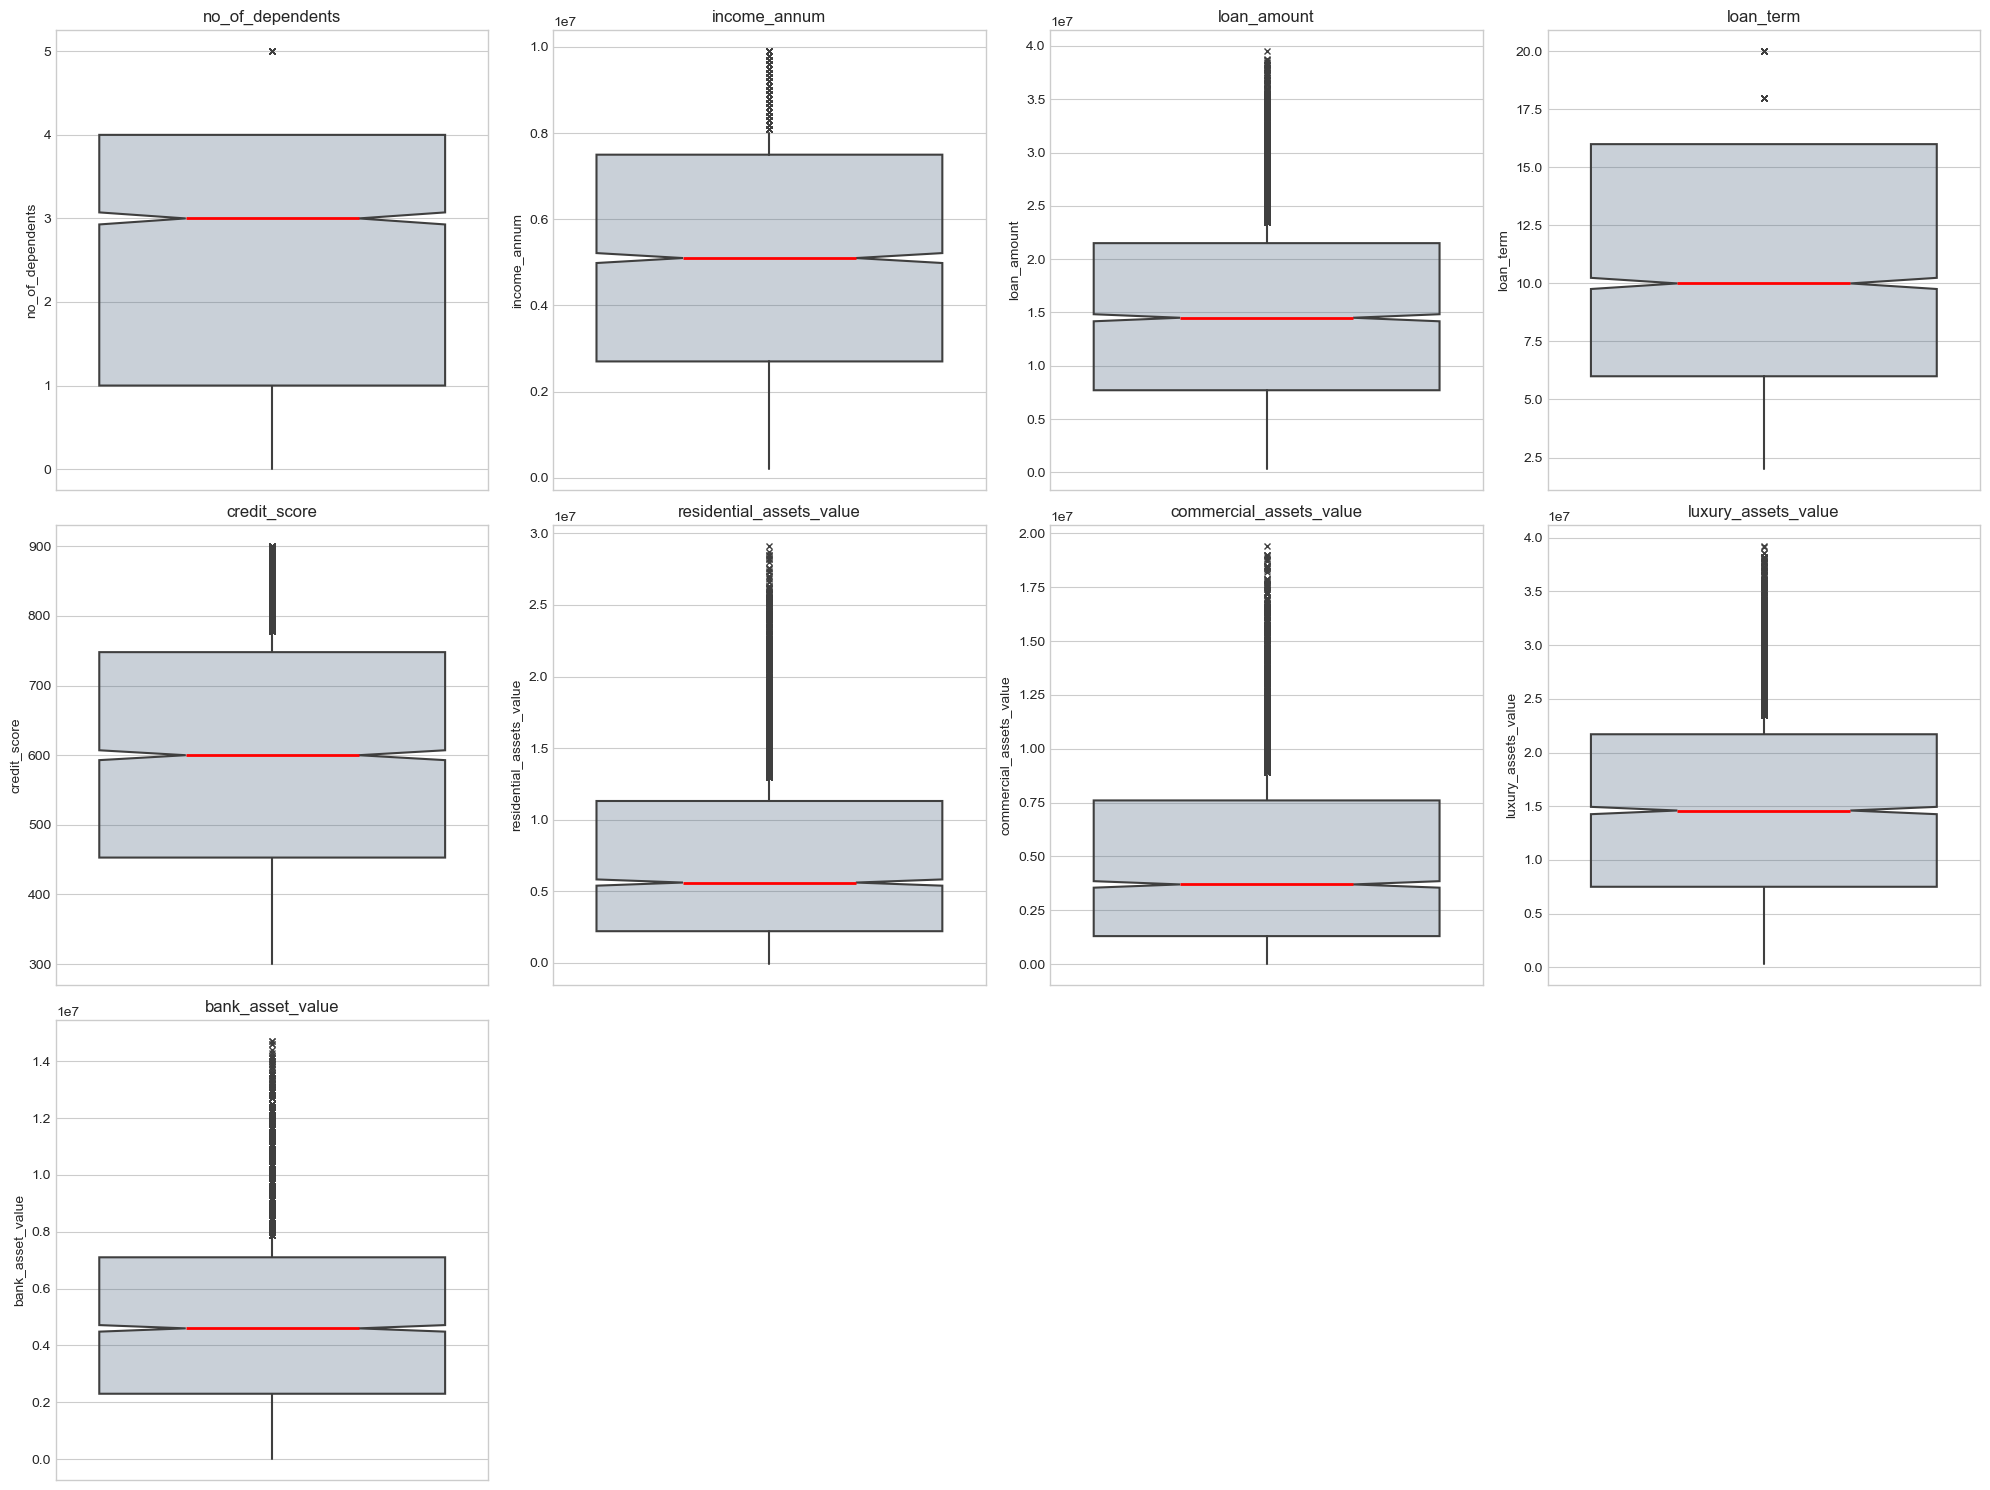

In [32]:
#Checking if our dataset has any outliers that might affect the integrity of our data

numeric_cols = ['no_of_dependents', 'income_annum',  'loan_amount', 'loan_term', 
               'credit_score', 'residential_assets_value', 
                'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Decide grid size
n_cols = 4  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # automatic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

for col, ax in zip(numeric_cols, axes.flatten()):
    sns.boxplot(
        y=df[col],
        notch=True,
        showcaps=False,
        flierprops={'marker':'x'},
        boxprops={'facecolor':(.3,.4,.5,.3)},
        medianprops={"color": "r", "linewidth": 2},
        whis=(0, 80),
        ax=ax
    )
    ax.set_title(col)

# Remove any empty subplots
for ax in axes.flatten()[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

📦 Our box plot shows outliers, however these prove to show a range of very high earners, high assets, high credit scores, high loan amounts and people that go for longer terms.

✔️ We have successfuly completed a basic visualisation of our data which is part of the steps of EDA. This gives us and stakeholders a visual representation of what is happening in our dataset.

## 🤖 Machine Learning

In this section we are going to be fancy and try our hands on machine learning to see how we can predict the loan approval status

### 🤖Applying Logistics Regression

We would start with logistics regression which is a form of classification.
In this, we are unable to have our model run with the presence of string values, this makes us to convert the string values present in this dataset to boolean values

In [33]:
### Converting eduation status to a boolean 
## Do not run this more than once 
df['education'] = df['education'].apply(lambda x: 1 if x == 'Graduate'  else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [34]:
df['self_employed'] = df['self_employed'].apply(lambda x: 1 if x == 'Yes'  else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Checking the head is to ensure that the changes have been applied properly. It was whilst checking this that I realised that it was only the else statement that was carried out. The debugging process led to finding a whitespace in the row values which was then stripped. If i have skipped this process, I would have gone into this model with an incorrect data which would affect the results i get.

#### Splitting test and train sets

In [35]:
# This code picks the entire table but drops the loan status as that is our target

X = df.drop('loan_status', axis = 1)

In [36]:
#Checking the changes we made are correct

X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000


In [37]:
y = df['loan_status'].apply(lambda x: 1 if x == 'Approved'  else 0)
y.head()

loan_id
1    1
2    0
3    0
4    0
5    0
Name: loan_status, dtype: int64

<Axes: xlabel='loan_status'>

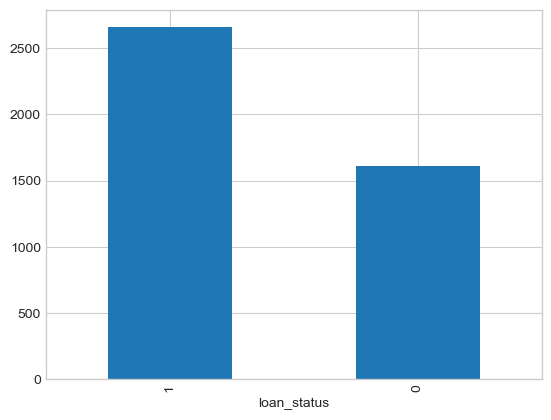

In [38]:
# Checking our target to see if it is balanced

y.value_counts().plot(
    kind = 'bar'
)

Our data is not balanced i.e leveled and training our model with this can make it biased hence we apply Synthetic Minority Oversampling Technique (SMOTE). This produces syntethic data based on our dataset and its behaviour to help us train the model without bias

In [39]:
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_resampled, y_resampled, = smote.fit_resample(X,y)

<Axes: xlabel='loan_status'>

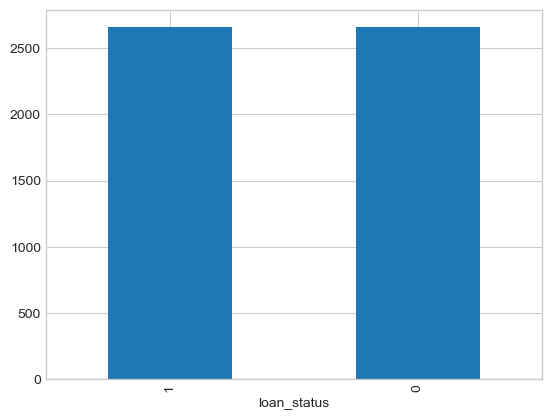

In [40]:
# Checking our target to see if it is balanced

y_resampled.value_counts().plot(
    kind = 'bar'
)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [42]:
print(X_train.shape)
print(X_resampled.shape)

(4249, 11)
(5312, 11)


We can see that over 800 rows has been added to our dataset to balance it

✔️ We now have a balanced dataset and can move to splitting our test and training sets

In [43]:
# Spliiting the test and train sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

#### Training a Logistics Regression model

In [44]:
#Selecting our model

model = LogisticRegression()

In [45]:
#Training our model

model.fit(X_train, y_train)

LogisticRegression()

In [46]:
#Testing our model

y_pred = model.predict(X_test)

In [47]:
#Checking how accurate our model is

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [48]:
print(f'Accuracy:  {accuracy:.2f}  →  This means the model is {accuracy*100:.0f}% accurate.')
print(f'Precision: {precision:.2f}  →  This means the model is {precision*100:.0f}% precise.')
print(f'Recall:    {recall:.2f}  →  This means the model is {recall*100:.0f}% sensitive.')
print(f'F1 Score:  {f1:.2f}  →  This means the model has a {f1*100:.0f}% balanced performance.')

Accuracy:  0.54  →  This means the model is 54% accurate.
Precision: 0.51  →  This means the model is 51% precise.
Recall:    0.52  →  This means the model is 52% sensitive.
F1 Score:  0.52  →  This means the model has a 52% balanced performance.


❌ 
It is not enough to train a dataset. We also have to check how accurate it is. These metrics show a very poor performance and it can be deduced that this model is less suitable for the prediction of this dataset. A good model is usually 70-90% depending on the model and we can see this is no where close to that number. This leads us to implementing a new model

### Implementing Random Forests

In [49]:
#Selecting our model

model_1 = RandomForestClassifier()

In [50]:
#Training our model

model_1.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
#Testing our model

y_pred_1 = model_1.predict(X_test)

In [52]:
#Checking how accurate our model is

accuracy = accuracy_score(y_test, y_pred_1)
precision = precision_score(y_test, y_pred_1)
recall = recall_score(y_test, y_pred_1)
f1 = f1_score(y_test, y_pred_1)

In [53]:
print(f'Accuracy:  {accuracy:.2f}  →  This means the model is {accuracy*100:.0f}% accurate.')
print(f'Precision: {precision:.2f}  →  This means the model is {precision*100:.0f}% precise.')
print(f'Recall:    {recall:.2f}  →  This means the model is {recall*100:.0f}% sensitive.')
print(f'F1 Score:  {f1:.2f}  →  This means the model has a {f1*100:.0f}% balanced performance.')

Accuracy:  0.98  →  This means the model is 98% accurate.
Precision: 0.96  →  This means the model is 96% precise.
Recall:    0.99  →  This means the model is 99% sensitive.
F1 Score:  0.98  →  This means the model has a 98% balanced performance.


✔️ This has a very good amount of accuracy and is suitable for the dataset

In [54]:
# Going further to understand our dataset, I want to check what the probability of being approved or not based on our model

y_prob_1 = model_1.predict_proba(X_test)[:, 1]

In [55]:
y_prob_1

array([0.98, 0.99, 0.98, ..., 0.93, 0.98, 0.74])

In [56]:
#Putting it in a tabular form and setting it with the actual value and predicted values

results = pd.DataFrame({
    "loan_id": X_test.index,   # keep the original ID
    "actual": y_test,
    "predicted": y_pred_1,
    "probability": y_prob_1
})

In [57]:
results.head()

,loan_id,actual,predicted,probability
1025,1025,1,1,0.98
4006,4006,1,1,0.99
2594,2594,1,1,0.98
1817,1817,1,1,0.99
1620,1620,0,0,0.22


In [58]:
#Checking what features affect the decison the most

importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": model_1.feature_importances_
})

In [59]:
importance["importance"] = importance["importance"].round(4)
importance = importance.sort_values(by="importance", ascending=False)

In [60]:
#printing the results

importance

,feature,importance
6,credit_score,0.8116
5,loan_term,0.0635
4,loan_amount,0.0260
3,income_annum,0.0171
8,commercial_assets_value,0.0160
9,luxury_assets_value,0.0158
7,residential_assets_value,0.0152
10,bank_asset_value,0.0149
0,no_of_dependents,0.0084
1,education,0.0065


## 📤 Exporting Files to BI
Outputs are prepared for integration with BI tools.
It might be worth noticing that a csv file has been exported to power BI before now and that is because I needed to maintain the data format for BI purposes.

In [61]:
#saving to export

results.to_csv("predictions.csv", index=False)

In [62]:
#saving to export

importance.to_csv("feature_importance.csv", index=False)

## 📈 Power BI Visualisations


“All monetary values are represented in Naira (₦) for clarity. The original dataset did not specify a currency, so this choice is for presentation only and does not affect the model outputs.”

## 📄 Conclusion

This notebook provided a comprehensive analysis of loan approval behavior by combining **exploratory data analysis**, **feature engineering**, **visualization**, and **machine learning**.

### 🔍 Key Findings
- **Exploratory Analysis:**  
  - Higher income levels are associated with larger loan amounts.  
  - Education categories show differing approval rates.  
  - Histograms revealed the distribution of loan amounts across applicants.
  - Credit score is the biggest factor that contributes to loan approval. 

- **Feature Engineering:**  
  - Categorical variables (e.g., education, asset types) were transformed into numeric features.  
  - Asset contribution measures highlighted the influence of various columns on approval.  

- **Machine Learning Insights:**  
  - Predictive models identified income, assets, and education as primary drivers of loan approval.  
  - Feature importance analysis confirmed these variables as the strongest predictors.  
  - The **What‑If Analysis** demonstrated how approval rates shift dynamically when income thresholds change.  

### ✅ Overall Insight
Loan approval is strongly influenced by **credit score** and **loan term**, with **education level**.  
The integration of descriptive analytics, predictive modeling, and interactive simulation offers both **transparency** and **actionable foresight**.  

This workflow ensures that insights are:  
- **Business‑friendly** (clear approval drivers)  
- **Technically robust** (clean feature engineering and modeling)  
- **Reproducible** (Python‑based, notebook‑ready)  

---

✨ By blending visualization, feature tables, and machine learning, this notebook delivers a transparent and interpretable framework for understanding and predicting loan approval behavior.